<a href="https://colab.research.google.com/github/sken3s/poker-hand-prediction/blob/main/poker_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ANN/poker-hand-training-true.data')
df.head(4)

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9


In [ ]:
df.rename(columns = {'1':'Suit_1', '10':'Card_1',
                     '1.1':'Suit_2', '11':'Card_2',
                     '1.2':'Suit_3', '13':'Card_3',
                     '1.3':'Suit_4', '12':'Card_4',
                     '1.4':'Suit_5', '1.5':'Card_5',
                     '9':'Hand'}, inplace = True)
df.head(4)

,Suit_1,Card_1,Suit_2,Card_2,Suit_3,Card_3,Suit_4,Card_4,Suit_5,Card_5,Hand
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9


In [ ]:
x_train = df.drop('Hand',axis=1).copy()
y_train = df[['Hand']].copy()

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ANN/poker-hand-testing.data')
df2.head(4)

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0


In [ ]:
df2.rename(columns = {'1':'Suit_1', '1.1':'Card_1',
                     '1.2':'Suit_2', '13':'Card_2',
                     '2':'Suit_3', '4':'Card_3',
                     '2.1':'Suit_4', '3':'Card_4',
                     '1.3':'Suit_5', '12':'Card_5',
                     '0':'Hand'}, inplace = True)
df2.head(4)

,Suit_1,Card_1,Suit_2,Card_2,Suit_3,Card_3,Suit_4,Card_4,Suit_5,Card_5,Hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0


In [ ]:
x_test = df2.drop('Hand',axis=1).copy()
y_test = df2[['Hand']].copy()

In [ ]:
print('X_train: ' + str(x_train.shape)) #numpy array
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (25009, 10)
Y_train: (25009, 1)
X_test:  (999999, 10)
Y_test:  (999999, 1)


# Preprocessing

In [ ]:
# encoding Suit_1 column
Suit_1_encoded = pd.get_dummies(x_train.Suit_1)
Suit_1_encoded.columns = ["Suit_1_1", "Suit_1_2", "Suit_1_3", "Suit_1_4"]

# encoding Suit_2 column
Suit_2_encoded = pd.get_dummies(x_train.Suit_2)
Suit_2_encoded.columns = ["Suit_2_1", "Suit_2_2", "Suit_2_3", "Suit_2_4"]

# encoding Suit_3 column
Suit_3_encoded = pd.get_dummies(x_train.Suit_3)
Suit_3_encoded.columns = ["Suit_3_1", "Suit_3_2", "Suit_3_3", "Suit_3_4"]

# encoding Suit_4 column
Suit_4_encoded = pd.get_dummies(x_train.Suit_4)
Suit_4_encoded.columns = ["Suit_4_1", "Suit_4_2", "Suit_4_3", "Suit_4_4"]

# encoding Suit_5 column
Suit_5_encoded = pd.get_dummies(x_train.Suit_5)
Suit_5_encoded.columns = ["Suit_5_1", "Suit_5_2", "Suit_5_3", "Suit_5_4"]

# encoding C1 column
Card_1_encoded = pd.get_dummies(x_train.Card_1)
Card_1_encoded.columns = ["Card_1_1", "Card_1_2", "Card_1_3", "Card_1_4", "Card_1_5", "Card_1_6", "Card_1_7", "Card_1_8", "Card_1_9", "Card_1_10", "Card_1_11", "Card_1_12", "Card_1_13"]

# encoding C2 column
Card_2_encoded = pd.get_dummies(x_train.Card_2)
Card_2_encoded.columns = ["Card_2_1", "Card_2_2", "Card_2_3", "Card_2_4", "Card_2_5", "Card_2_6", "Card_2_7", "Card_2_8", "Card_2_9", "Card_2_10", "Card_2_11", "Card_2_12", "Card_2_13"]

# encoding C3 column
Card_3_encoded = pd.get_dummies(x_train.Card_3)
Card_3_encoded.columns = ["Card_3_1", "Card_3_2", "Card_3_3", "Card_3_4", "Card_3_5", "Card_3_6", "Card_3_7", "Card_3_8", "Card_3_9", "Card_3_10", "Card_3_11", "Card_3_12", "Card_3_13"]


# encoding C4 column
Card_4_encoded = pd.get_dummies(x_train.Card_4)
Card_4_encoded.columns = ["Card_4_1", "Card_4_2", "Card_4_3", "Card_4_4", "Card_4_5", "Card_4_6", "Card_4_7", "Card_4_8", "Card_4_9", "Card_4_10", "Card_4_11", "Card_4_12", "Card_4_13"]


# encoding C5 column
Card_5_encoded = pd.get_dummies(x_train.Card_5)
Card_5_encoded.columns = ["Card_5_1", "Card_5_2", "Card_5_3", "Card_5_4", "Card_5_5", "Card_5_6", "Card_5_7", "Card_5_8", "Card_5_9", "Card_5_10", "Card_5_11", "Card_5_12", "Card_5_13"]







In [ ]:
X_columns = [Suit_1_encoded,Card_1_encoded, Suit_2_encoded, Card_2_encoded, Suit_3_encoded, Card_3_encoded, Suit_4_encoded, Card_4_encoded, Suit_5_encoded,Card_5_encoded]
X_train = pd.concat(X_columns, axis = 1)
X_train

,Suit_1_1,Suit_1_2,Suit_1_3,Suit_1_4,Card_1_1,Card_1_2,Card_1_3,Card_1_4,Card_1_5,Card_1_6,...,Card_5_4,Card_5_5,Card_5_6,Card_5_7,Card_5_8,Card_5_9,Card_5_10,Card_5_11,Card_5_12,Card_5_13
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25004,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25005,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25006,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25007,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# encoding Suit_1 column
Suit_1_encoded = pd.get_dummies(x_test.Suit_1)
Suit_1_encoded.columns = ["Suit_1_1", "Suit_1_2", "Suit_1_3", "Suit_1_4"]

# encoding Suit_2 column
Suit_2_encoded = pd.get_dummies(x_test.Suit_2)
Suit_2_encoded.columns = ["Suit_2_1", "Suit_2_2", "Suit_2_3", "Suit_2_4"]

# encoding Suit_3 column
Suit_3_encoded = pd.get_dummies(x_test.Suit_3)
Suit_3_encoded.columns = ["Suit_3_1", "Suit_3_2", "Suit_3_3", "Suit_3_4"]

# encoding Suit_4 column
Suit_4_encoded = pd.get_dummies(x_test.Suit_4)
Suit_4_encoded.columns = ["Suit_4_1", "Suit_4_2", "Suit_4_3", "Suit_4_4"]

# encoding Suit_5 column
Suit_5_encoded = pd.get_dummies(x_test.Suit_5)
Suit_5_encoded.columns = ["Suit_5_1", "Suit_5_2", "Suit_5_3", "Suit_5_4"]

# encoding C1 column
Card_1_encoded = pd.get_dummies(x_test.Card_1)
Card_1_encoded.columns = ["Card_1_1", "Card_1_2", "Card_1_3", "Card_1_4", "Card_1_5", "Card_1_6", "Card_1_7", "Card_1_8", "Card_1_9", "Card_1_10", "Card_1_11", "Card_1_12", "Card_1_13"]

# encoding C2 column
Card_2_encoded = pd.get_dummies(x_test.Card_2)
Card_2_encoded.columns = ["Card_2_1", "Card_2_2", "Card_2_3", "Card_2_4", "Card_2_5", "Card_2_6", "Card_2_7", "Card_2_8", "Card_2_9", "Card_2_10", "Card_2_11", "Card_2_12", "Card_2_13"]

# encoding C3 column
Card_3_encoded = pd.get_dummies(x_test.Card_3)
Card_3_encoded.columns = ["Card_3_1", "Card_3_2", "Card_3_3", "Card_3_4", "Card_3_5", "Card_3_6", "Card_3_7", "Card_3_8", "Card_3_9", "Card_3_10", "Card_3_11", "Card_3_12", "Card_3_13"]

# encoding C4 column
Card_4_encoded = pd.get_dummies(x_test.Card_4)
Card_4_encoded.columns = ["Card_4_1", "Card_4_2", "Card_4_3", "Card_4_4", "Card_4_5", "Card_4_6", "Card_4_7", "Card_4_8", "Card_4_9", "Card_4_10", "Card_4_11", "Card_4_12", "Card_4_13"]

# encoding C5 column
Card_5_encoded = pd.get_dummies(x_test.Card_5)
Card_5_encoded.columns = ["Card_5_1", "Card_5_2", "Card_5_3", "Card_5_4", "Card_5_5", "Card_5_6", "Card_5_7", "Card_5_8", "Card_5_9", "Card_5_10", "Card_5_11", "Card_5_12", "Card_5_13"]







In [ ]:
X_columns = [Suit_1_encoded,Card_1_encoded, Suit_2_encoded, Card_2_encoded, Suit_3_encoded, Card_3_encoded, Suit_4_encoded, Card_4_encoded, Suit_5_encoded,Card_5_encoded]
X_test = pd.concat(X_columns, axis = 1)
X_test

,Suit_1_1,Suit_1_2,Suit_1_3,Suit_1_4,Card_1_1,Card_1_2,Card_1_3,Card_1_4,Card_1_5,Card_1_6,...,Card_5_4,Card_5_5,Card_5_6,Card_5_7,Card_5_8,Card_5_9,Card_5_10,Card_5_11,Card_5_12,Card_5_13
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
999995,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
999997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# encoding Y_train column
Y_train = pd.get_dummies(y_train.Hand)
Y_train.columns = ["y0","y1", "y2", "y3", "y4","y5","y6", "y7", "y8", "y9"]

In [ ]:
# encoding Y_test column
Y_test = pd.get_dummies(y_test.Hand)
Y_test.columns = ["y0","y1", "y2", "y3", "y4","y5","y6", "y7", "y8", "y9"]

In [ ]:
print('X_train: ' + str(X_train.shape)) #numpy array
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (25009, 85)
Y_train: (25009, 10)
X_test:  (999999, 85)
Y_test:  (999999, 10)


#Building Models

##Model with Momentem Learning vs without

In [ ]:
x_input_dim=X_train.shape[1]

In [ ]:
momentum_model = Sequential()

In [ ]:
no_momentum_model = Sequential()

In [ ]:
momentum_model.add(Dense(64, activation ='relu', input_dim=x_input_dim))
momentum_model.add(Dense(32, activation='relu'))
momentum_model.add(Dense(10,activation='softmax'))

In [ ]:
no_momentum_model.add(Dense(64, activation ='relu', input_dim=x_input_dim))
no_momentum_model.add(Dense(32, activation='relu'))
no_momentum_model.add(Dense(10,activation='softmax'))

In [ ]:
momentum_sgd = SGD(learning_rate=0.01,momentum=0.9)

In [ ]:
no_momentum_sgd = SGD(learning_rate=0.01)

In [ ]:
momentum_model.compile(loss='categorical_crossentropy', optimizer=momentum_sgd, metrics=['accuracy'])

In [ ]:
no_momentum_model.compile(loss='categorical_crossentropy', optimizer=no_momentum_sgd, metrics=['accuracy'])

In [ ]:
history_no = no_momentum_model.fit(X_train, Y_train, batch_size=60, epochs=60, validation_split=0.2)

Epoch 1/60
334/334 [==============================] - 2s 4ms/step - loss: 1.2610 - accuracy: 0.4773 - val_loss: 1.0271 - val_accuracy: 0.4842
Epoch 2/60
334/334 [==============================] - 2s 5ms/step - loss: 1.0195 - accuracy: 0.4837 - val_loss: 1.0015 - val_accuracy: 0.4768
Epoch 3/60
334/334 [==============================] - 2s 5ms/step - loss: 1.0039 - accuracy: 0.4863 - val_loss: 0.9931 - val_accuracy: 0.4840
Epoch 4/60
334/334 [==============================] - 1s 4ms/step - loss: 0.9983 - accuracy: 0.4886 - val_loss: 0.9895 - val_accuracy: 0.4852
Epoch 5/60
334/334 [==============================] - 3s 8ms/step - loss: 0.9952 - accuracy: 0.4889 - val_loss: 0.9877 - val_accuracy: 0.4920
Epoch 6/60
334/334 [==============================] - 2s 7ms/step - loss: 0.9932 - accuracy: 0.4906 - val_loss: 0.9864 - val_accuracy: 0.4952
Epoch 7/60
334/334 [==============================] - 3s 8ms/step - loss: 0.9918 - accuracy: 0.4917 - val_loss: 0.9848 - val_accuracy: 0.4922
Epoch 

In [ ]:
no_momentum_model.evaluate(X_test,  Y_test, verbose=2)

31250/31250 - 40s - loss: 0.9650 - accuracy: 0.5336 - 40s/epoch - 1ms/step


[0.9650049209594727, 0.5336195230484009]

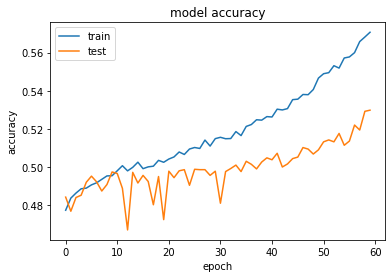

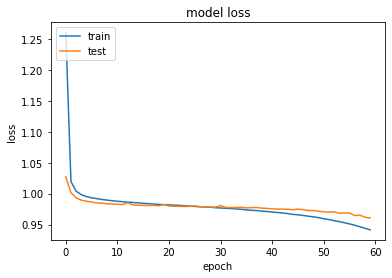

In [ ]:
# summarize history for accuracy
#plt.ylim([0.9, 1.2])
plt.plot(history_no.history['accuracy'])
plt.plot(history_no.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_no.history['loss'])
plt.plot(history_no.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history = momentum_model.fit(X_train, Y_train, batch_size=60, epochs=60, validation_split=0.2)

Epoch 1/60
334/334 [==============================] - 2s 4ms/step - loss: 1.0739 - accuracy: 0.4718 - val_loss: 0.9907 - val_accuracy: 0.4352
Epoch 2/60
334/334 [==============================] - 1s 2ms/step - loss: 0.9909 - accuracy: 0.4876 - val_loss: 0.9817 - val_accuracy: 0.4824
Epoch 3/60
334/334 [==============================] - 1s 2ms/step - loss: 0.9873 - accuracy: 0.4931 - val_loss: 0.9801 - val_accuracy: 0.4916
Epoch 4/60
334/334 [==============================] - 1s 2ms/step - loss: 0.9854 - accuracy: 0.4977 - val_loss: 0.9775 - val_accuracy: 0.4994
Epoch 5/60
334/334 [==============================] - 2s 5ms/step - loss: 0.9810 - accuracy: 0.5020 - val_loss: 0.9800 - val_accuracy: 0.4814
Epoch 6/60
334/334 [==============================] - 1s 2ms/step - loss: 0.9784 - accuracy: 0.5118 - val_loss: 0.9772 - val_accuracy: 0.5058
Epoch 7/60
334/334 [==============================] - 1s 3ms/step - loss: 0.9709 - accuracy: 0.5274 - val_loss: 0.9717 - val_accuracy: 0.5162
Epoch 

In [ ]:
momentum_model.evaluate(X_test,  Y_test, verbose=2)

31250/31250 - 40s - loss: 0.1055 - accuracy: 0.9731 - 40s/epoch - 1ms/step


[0.10551849752664566, 0.9730679988861084]

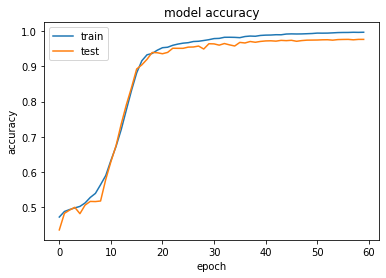

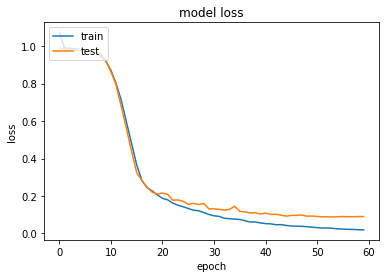

In [ ]:
# summarize history for accuracy
#plt.ylim([0.9, 1.2])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NO MOMENTUM

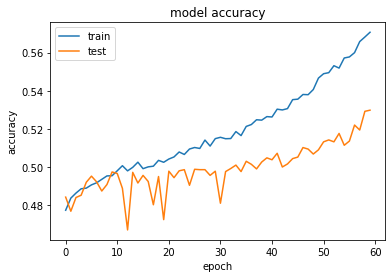

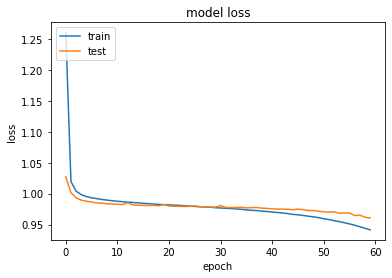

In [ ]:
# summarize history for accuracy
#plt.ylim([0.9, 1.2])
plt.plot(history_no.history['accuracy'])
plt.plot(history_no.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_no.history['loss'])
plt.plot(history_no.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As we can observe from the above 4 graphs, the model with momentum converges much faster than the model without, at the end of 60 epochs model with momentum reaches accuracy of 0.9731 , while without it, model reaches only 0.5707

##Early Stopping vs No Early Stopping

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
momentum_es = Sequential()

In [ ]:
momentum_es.add(Dense(64, activation ='relu', input_dim=x_input_dim))
momentum_es.add(Dense(32, activation='relu'))
momentum_es.add(Dense(10,activation='softmax'))

In [ ]:
momentum_es.compile(loss='categorical_crossentropy', optimizer=momentum_sgd, metrics=['accuracy'])

In [ ]:
history_es = momentum_es.fit(X_train, Y_train, batch_size=60, epochs=60, validation_split=0.2, callbacks=[es])

Epoch 1/60
334/334 [==============================] - 1s 3ms/step - loss: 1.0735 - accuracy: 0.4772 - val_loss: 0.9806 - val_accuracy: 0.4992
Epoch 2/60
334/334 [==============================] - 1s 2ms/step - loss: 0.9907 - accuracy: 0.4900 - val_loss: 0.9791 - val_accuracy: 0.4868
Epoch 3/60
334/334 [==============================] - 1s 2ms/step - loss: 0.9876 - accuracy: 0.4943 - val_loss: 0.9779 - val_accuracy: 0.4986
Epoch 4/60
334/334 [==============================] - 1s 2ms/step - loss: 0.9832 - accuracy: 0.5056 - val_loss: 0.9774 - val_accuracy: 0.4938
Epoch 5/60
334/334 [==============================] - 1s 2ms/step - loss: 0.9783 - accuracy: 0.5117 - val_loss: 0.9731 - val_accuracy: 0.5066
Epoch 6/60
334/334 [==============================] - 1s 2ms/step - loss: 0.9732 - accuracy: 0.5199 - val_loss: 0.9794 - val_accuracy: 0.4942
Epoch 7/60
334/334 [==============================] - 1s 2ms/step - loss: 0.9651 - accuracy: 0.5334 - val_loss: 0.9692 - val_accuracy: 0.5202
Epoch 

In [ ]:
momentum_es.evaluate(X_test,  Y_test, verbose=2)

31250/31250 - 39s - loss: 0.1988 - accuracy: 0.9399 - 39s/epoch - 1ms/step


[0.19880712032318115, 0.9399329423904419]

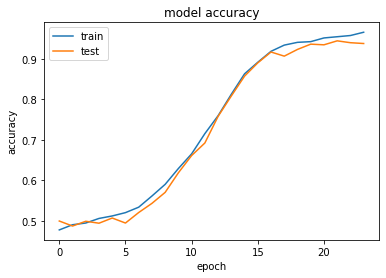

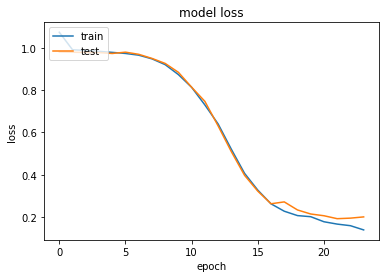

In [ ]:
# summarize history for accuracy
#plt.ylim([0.9, 1.2])
plt.plot(history_es.history['accuracy'])
plt.plot(history_es.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_es.history['loss'])
plt.plot(history_es.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

WITHOUT EARLY STOPPING

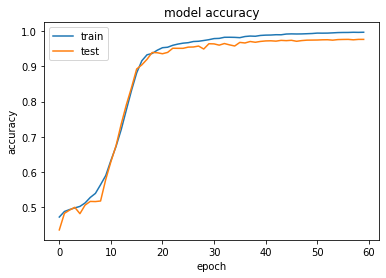

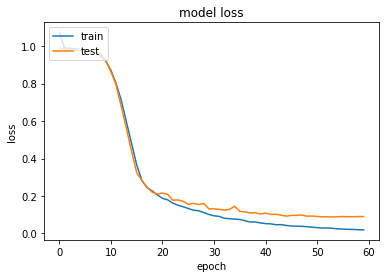

In [ ]:
# summarize history for accuracy
#plt.ylim([0.9, 1.2])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As we can see from the above 4 graphs, we can see that when there is no early stopping, the model reaches accuracy of almost 100% which is a scenario of overfitting. In the instance where there is Early stopping we stop at 24 epochs where the loss function is increasing , hence preventing early stopping 

#Optimize Hyper Parameters

In [ ]:
from tensorboard.plugins.hparams import api as hp

In [ ]:
logdir = "logs/hparamas"

In [ ]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([ 40, 50,60,70]))
HP_LOSS = hp.HParam('loss', hp.Discrete(['categorical_crossentropy','kl_divergence']))
HP_ACTIVATION = hp.HParam('activation', hp.Discrete(['relu', 'sigmoid', 'tanh']))

In [ ]:
METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer(logdir).as_default():
    hp.hparams_config(
        hparams=[HP_NUM_UNITS, HP_LOSS, HP_ACTIVATION],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],)

In [ ]:
def create_model(hparams):

    model = Sequential()

    model.add(Dense(hparams[HP_NUM_UNITS], activation = hparams[HP_ACTIVATION], input_dim=x_input_dim))
    model.add(Dense(32, activation=hparams[HP_ACTIVATION]))
    model.add(Dense(10,activation='softmax'))

    momentum_sgd = SGD(learning_rate=0.01,momentum=0.9)

    model.compile(loss=[HP_LOSS], optimizer=momentum_sgd, metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=60, epochs=30, validation_split=0.2)

    loss, accuracy = model.evaluate(X_test, Y_test)

    return accuracy

In [ ]:
def experiment(experiment_dir, hparams):

    with tf.summary.create_file_writer(experiment_dir).as_default():
        hp.hparams(hparams)
        accuracy = create_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
experiment_no = 0

for num_units in HP_NUM_UNITS.domain.values:
    for activation_function in HP_ACTIVATION.domain.values:
        for loss_funcation in HP_LOSS.domain.values:
            hparams = {
                HP_NUM_UNITS: num_units,
                HP_ACTIVATION: activation_function,
                HP_LOSS: loss_funcation,}

            experiment_name = f'Experiment {experiment_no}'
            print(f'Starting Experiment: {experiment_name}')
            print({h.name: hparams[h] for h in hparams})
            experiment(logdir + experiment_name, hparams)
            experiment_no += 1

In [ ]:
tensorboard -- logdir logs/hparam_tuning